In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import itertools

In [2]:
df = pd.read_csv('compiled_13591.out')

In [3]:
df

,TrainFirstMulThenAdd,TrainGaussStdMul,TrainGaussStdAdd,InfFirstMulThenAdd,InfGaussStdMul,InfGaussStdAdd,Accuracy
0,True,0.599484,46.415888,False,1.000000e-04,1.000000e-04,61.12
1,True,0.599484,46.415888,False,7.742637e-03,1.000000e-04,61.05
2,True,0.599484,46.415888,False,5.994843e-01,1.000000e-04,69.40
3,True,0.599484,46.415888,False,4.641589e+01,1.000000e-04,14.93
4,True,0.599484,46.415888,False,3.593814e+03,1.000000e-04,13.58
...,...,...,...,...,...,...,...
9995,True,0.007743,0.599484,False,2.782559e+05,1.000000e+13,9.95
9996,True,0.007743,0.599484,False,2.154435e+07,1.000000e+13,10.00
9997,True,0.007743,0.599484,False,1.668101e+09,1.000000e+13,10.03
9998,True,0.007743,0.599484,False,1.291550e+11,1.000000e+13,9.94


In [4]:
# drop 'TrainFirstMulThenAdd' and 'InfFirstMulThenAdd' columns
columns_to_drop = ['InfFirstMulThenAdd', 'InfFirstMulThenAdd']
df = df.drop(columns=columns_to_drop)

In [5]:
df

,TrainFirstMulThenAdd,TrainGaussStdMul,TrainGaussStdAdd,InfGaussStdMul,InfGaussStdAdd,Accuracy
0,True,0.599484,46.415888,1.000000e-04,1.000000e-04,61.12
1,True,0.599484,46.415888,7.742637e-03,1.000000e-04,61.05
2,True,0.599484,46.415888,5.994843e-01,1.000000e-04,69.40
3,True,0.599484,46.415888,4.641589e+01,1.000000e-04,14.93
4,True,0.599484,46.415888,3.593814e+03,1.000000e-04,13.58
...,...,...,...,...,...,...
9995,True,0.007743,0.599484,2.782559e+05,1.000000e+13,9.95
9996,True,0.007743,0.599484,2.154435e+07,1.000000e+13,10.00
9997,True,0.007743,0.599484,1.668101e+09,1.000000e+13,10.03
9998,True,0.007743,0.599484,1.291550e+11,1.000000e+13,9.94


In [6]:
# generate the inference config plot
def group_by_aggregate_inf_config_plot(df, aggr_fun = 'mean'):
    # Configure specific plot
    inf_config_plot_group_by_columns = ['InfGaussStdMul', 'InfGaussStdAdd']  # Columns to group by
    inf_config_plot_columns_to_drop = ['TrainGaussStdMul', 'TrainGaussStdAdd']  # Columns to drop
    # group by columns and aggregate
    inf_config_plot_df = df.groupby(inf_config_plot_group_by_columns)['Accuracy'].agg(aggr_fun).reset_index()
    return inf_config_plot_df


def group_by_aggregate_train_config_plot(df, aggr_fun = 'mean'):
    # Configure specific plot
    train_config_plot_group_by_columns = ['TrainGaussStdMul', 'TrainGaussStdAdd']  # Columns to group by
    train_config_plot_columns_to_drop = ['InfGaussStdMul', 'InfGaussStdAdd']  # Columns to drop
    # group by columns and aggregate
    train_config_plot_df = df.groupby(train_config_plot_group_by_columns)['Accuracy'].agg(aggr_fun).reset_index()
    return train_config_plot_df

In [7]:
inf_config_plot_df = group_by_aggregate_inf_config_plot(df, aggr_fun='max')
inf_config_plot_df

,InfGaussStdMul,InfGaussStdAdd,Accuracy
0,1.000000e-04,1.000000e-04,76.65
1,1.000000e-04,7.742637e-03,76.64
2,1.000000e-04,5.994843e-01,76.12
3,1.000000e-04,4.641589e+01,74.24
4,1.000000e-04,3.593814e+03,63.11
...,...,...,...
95,1.000000e+13,2.782559e+05,10.50
96,1.000000e+13,2.154435e+07,10.72
97,1.000000e+13,1.668101e+09,10.53
98,1.000000e+13,1.291550e+11,10.50


In [8]:
train_config_plot_df = group_by_aggregate_train_config_plot(df, aggr_fun='mean')
train_config_plot_df

,TrainGaussStdMul,TrainGaussStdAdd,Accuracy
0,1.000000e-04,1.000000e-04,14.3910
1,1.000000e-04,7.742637e-03,14.7736
2,1.000000e-04,5.994843e-01,14.2916
3,1.000000e-04,4.641589e+01,15.9464
4,1.000000e-04,3.593814e+03,15.5327
...,...,...,...
95,1.000000e+13,2.782559e+05,11.7022
96,1.000000e+13,2.154435e+07,11.6763
97,1.000000e+13,1.668101e+09,11.6601
98,1.000000e+13,1.291550e+11,11.7384


In [9]:
# calculate vmin and vmax of the colorbar so its limits are the same for both plots
vmin_val = min(train_config_plot_df['Accuracy'].min(), inf_config_plot_df['Accuracy'].min())
vmax_val = max(train_config_plot_df['Accuracy'].max(), inf_config_plot_df['Accuracy'].max())
# instead set fixed
vmin_val = 0.0
vmax_val = 80.0

In [10]:
def plot_accuracy_train_config_plot(train_config_plot_df, vmin_val, vmax_val, postfix=''):
    """
    Plots a scatter plot of Accuracy by TrainGaussStdMul and TrainGaussStdAdd with custom markers and color scale.

    Parameters:
    - train_config_plot_df: DataFrame containing the columns 'TrainGaussStdMul', 'TrainGaussStdAdd', and 'Accuracy'.
    - vmin_val: Minimum value for the color scale.
    - vmax_val: Maximum value for the color scale.
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Define custom rectangle marker
    rect_coords = [(1, -1), (1, 1), (-1, 1), (-1, -1), (1, -1)]  # Rectangle vertices
    rect_codes = [mpath.Path.MOVETO] + [mpath.Path.LINETO]*3 + [mpath.Path.CLOSEPOLY]
    rectangle_path = mpath.Path(rect_coords, rect_codes)
    
    # Plot scatter with rectangle markers
    scatter = ax.scatter(train_config_plot_df['TrainGaussStdMul'], train_config_plot_df['TrainGaussStdAdd'], c=train_config_plot_df['Accuracy'], s=2200, cmap='viridis', alpha=0.75, edgecolors='w', linewidths=0.5, marker=rectangle_path, vmin=vmin_val, vmax=vmax_val)

    # Plot scatter with '+' markers
    ax.scatter(train_config_plot_df['TrainGaussStdMul'], train_config_plot_df['TrainGaussStdAdd'], c=train_config_plot_df['Accuracy'], s=30, alpha=1.0, edgecolors='r', linewidths=1, marker='+', vmin=vmin_val, vmax=vmax_val)

    # Set logarithmic scale for both axes
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Set labels and titles
    ax.set_xlabel('TrainGaussStdMul')
    ax.set_ylabel('TrainGaussStdAdd')
    # ax.set_title('Scatter Plot of Accuracy by TrainGaussStdMul and TrainGaussStdAdd')

    # Add colorbar to the plot
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Accuracy')

    # Save the plot
    figure_folder = 'figures'
    plt.savefig(f'{figure_folder}/train_config_plot_{postfix}.png')
    # Display the plot
    plt.show()

In [11]:
def plot_accuracy_inf_config_plot(inf_config_plot_df, vmin_val, vmax_val, postfix=''):
    """
    Plots a scatter plot of Accuracy by InfGaussStdMul and InfGaussStdAdd with custom markers and color scale.

    Parameters:
    - inf_config_plot_df: DataFrame containing the columns 'InfGaussStdMul', 'InfGaussStdAdd', and 'Accuracy'.
    - vmin_val: Minimum value for the color scale.
    - vmax_val: Maximum value for the color scale.
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Define custom rectangle marker
    rect_coords = [(1, -1), (1, 1), (-1, 1), (-1, -1), (1, -1)]  # Rectangle vertices
    rect_codes = [mpath.Path.MOVETO] + [mpath.Path.LINETO]*3 + [mpath.Path.CLOSEPOLY]
    rectangle_path = mpath.Path(rect_coords, rect_codes)
    
    # Plot scatter with rectangle markers
    scatter = ax.scatter(inf_config_plot_df['InfGaussStdMul'], inf_config_plot_df['InfGaussStdAdd'], c=inf_config_plot_df['Accuracy'], s=2200, cmap='viridis', alpha=0.75, edgecolors='w', linewidths=0.5, marker=rectangle_path, vmin=vmin_val, vmax=vmax_val)

    # Plot scatter with '+' markers
    ax.scatter(inf_config_plot_df['InfGaussStdMul'], inf_config_plot_df['InfGaussStdAdd'], c=inf_config_plot_df['Accuracy'], s=30, alpha=1.0, edgecolors='r', linewidths=1, marker='+', vmin=vmin_val, vmax=vmax_val)

    # Set logarithmic scale for both axes
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Set labels and titles
    ax.set_xlabel('InfGaussStdMul')
    ax.set_ylabel('InfGaussStdAdd')
    # ax.set_title('Scatter Plot of Accuracy by InfGaussStdMul and InfGaussStdAdd')

    # Add colorbar to the plot
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Accuracy')

    # Save the plot
    figure_folder = 'figures'
    plt.savefig(f'{figure_folder}/inf_config_plot_{postfix}.png')

    # Display the plot
    plt.show()

In [12]:
def plot_accuracy_train_config_plot_fixed_axis(train_config_plot_df, vmin_val, vmax_val, x_min, x_max, y_min, y_max):
    """
    Plots a scatter plot of Accuracy by TrainGaussStdMul and TrainGaussStdAdd with custom markers, color scale, and fixed axis ranges.

    Parameters:
    - train_config_plot_df: DataFrame containing the columns 'TrainGaussStdMul', 'TrainGaussStdAdd', and 'Accuracy'.
    - vmin_val: Minimum value for the color scale.
    - vmax_val: Maximum value for the color scale.
    - x_min: Minimum value for the x-axis.
    - x_max: Maximum value for the x-axis.
    - y_min: Minimum value for the y-axis.
    - y_max: Maximum value for the y-axis.
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Define custom rectangle marker
    rect_coords = [(1, -1), (1, 1), (-1, 1), (-1, -1), (1, -1)]  # Rectangle vertices
    rect_codes = [mpath.Path.MOVETO] + [mpath.Path.LINETO]*3 + [mpath.Path.CLOSEPOLY]
    rectangle_path = mpath.Path(rect_coords, rect_codes)
    
    # Plot scatter with rectangle markers
    scatter = ax.scatter(train_config_plot_df['TrainGaussStdMul'], train_config_plot_df['TrainGaussStdAdd'], c=train_config_plot_df['Accuracy'], s=2200, cmap='viridis', alpha=0.75, edgecolors='w', linewidths=0.5, marker=rectangle_path, vmin=vmin_val, vmax=vmax_val)

    # Plot scatter with '+' markers
    ax.scatter(train_config_plot_df['TrainGaussStdMul'], train_config_plot_df['TrainGaussStdAdd'], c=train_config_plot_df['Accuracy'], s=30, alpha=1.0, edgecolors='r', linewidths=1, marker='+', vmin=vmin_val, vmax=vmax_val)

    # Set logarithmic scale for both axes
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Fix the axis range
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Set labels and titles
    ax.set_xlabel('TrainGaussStdMul')
    ax.set_ylabel('TrainGaussStdAdd')
    # ax.set_title('Scatter Plot of Accuracy by TrainGaussStdMul and TrainGaussStdAdd')

    # Add colorbar to the plot
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Accuracy')

    # Display the plot
    plt.show()

In [13]:
def plot_accuracy_inf_config_plot_fixed_axis(inf_config_plot_df, vmin_val, vmax_val, x_min, x_max, y_min, y_max):
    """
    Plots a scatter plot of Accuracy by InfGaussStdMul and InfGaussStdAdd with custom markers, color scale, and fixed axis ranges.

    Parameters:
    - inf_config_plot_df: DataFrame containing the columns 'InfGaussStdMul', 'InfGaussStdAdd', and 'Accuracy'.
    - vmin_val: Minimum value for the color scale.
    - vmax_val: Maximum value for the color scale.
    - x_min: Minimum value for the x-axis.
    - x_max: Maximum value for the x-axis.
    - y_min: Minimum value for the y-axis.
    - y_max: Maximum value for the y-axis.
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Define custom rectangle marker
    rect_coords = [(1, -1), (1, 1), (-1, 1), (-1, -1), (1, -1)]  # Rectangle vertices
    rect_codes = [mpath.Path.MOVETO] + [mpath.Path.LINETO]*3 + [mpath.Path.CLOSEPOLY]
    rectangle_path = mpath.Path(rect_coords, rect_codes)
    
    # Plot scatter with rectangle markers
    scatter = ax.scatter(inf_config_plot_df['InfGaussStdMul'], inf_config_plot_df['InfGaussStdAdd'], c=inf_config_plot_df['Accuracy'], s=2200, cmap='viridis', alpha=0.75, edgecolors='w', linewidths=0.5, marker=rectangle_path, vmin=vmin_val, vmax=vmax_val)

    # Plot scatter with '+' markers
    ax.scatter(inf_config_plot_df['InfGaussStdMul'], inf_config_plot_df['InfGaussStdAdd'], c=inf_config_plot_df['Accuracy'], s=30, alpha=1.0, edgecolors='r', linewidths=1, marker='+', vmin=vmin_val, vmax=vmax_val)

    # Set logarithmic scale for both axes
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Fix the axis range
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Set labels and titles
    ax.set_xlabel('InfGaussStdMul')
    ax.set_ylabel('InfGaussStdAdd')
    # ax.set_title('Scatter Plot of Accuracy by InfGaussStdMul and InfGaussStdAdd')

    # Add colorbar to the plot
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Accuracy')

    # Display the plot
    plt.show()

/var/folders/sz/y9cc8wkx58b3gbgkmhx_n1h40000gn/T/ipykernel_38389/3174555750.py:22: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(train_config_plot_df['TrainGaussStdMul'], train_config_plot_df['TrainGaussStdAdd'], c=train_config_plot_df['Accuracy'], s=30, alpha=1.0, edgecolors='r', linewidths=1, marker='+', vmin=vmin_val, vmax=vmax_val)


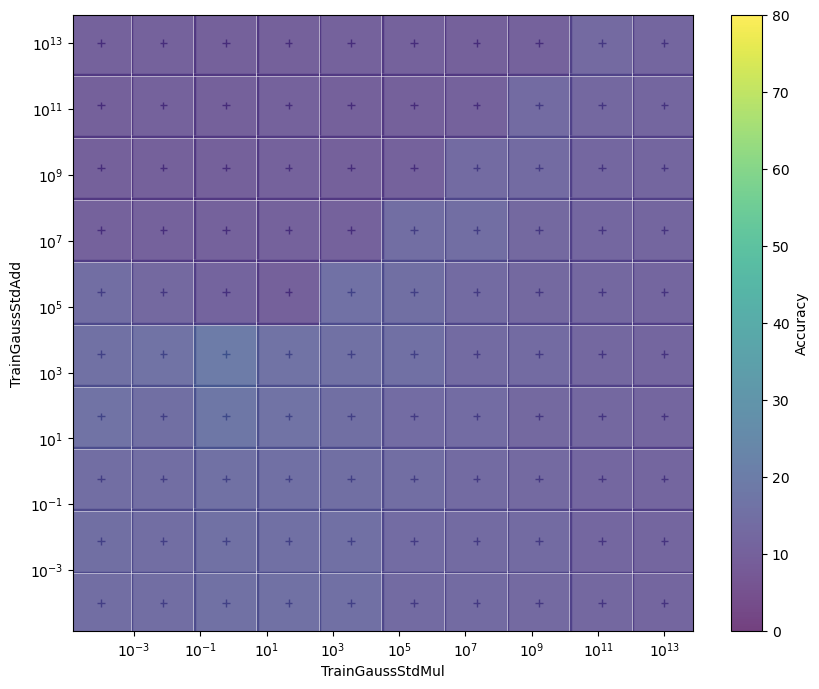

In [14]:
plot_accuracy_train_config_plot(train_config_plot_df, vmin_val, vmax_val, postfix='all_max')

/var/folders/sz/y9cc8wkx58b3gbgkmhx_n1h40000gn/T/ipykernel_38389/1184646596.py:22: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(inf_config_plot_df['InfGaussStdMul'], inf_config_plot_df['InfGaussStdAdd'], c=inf_config_plot_df['Accuracy'], s=30, alpha=1.0, edgecolors='r', linewidths=1, marker='+', vmin=vmin_val, vmax=vmax_val)


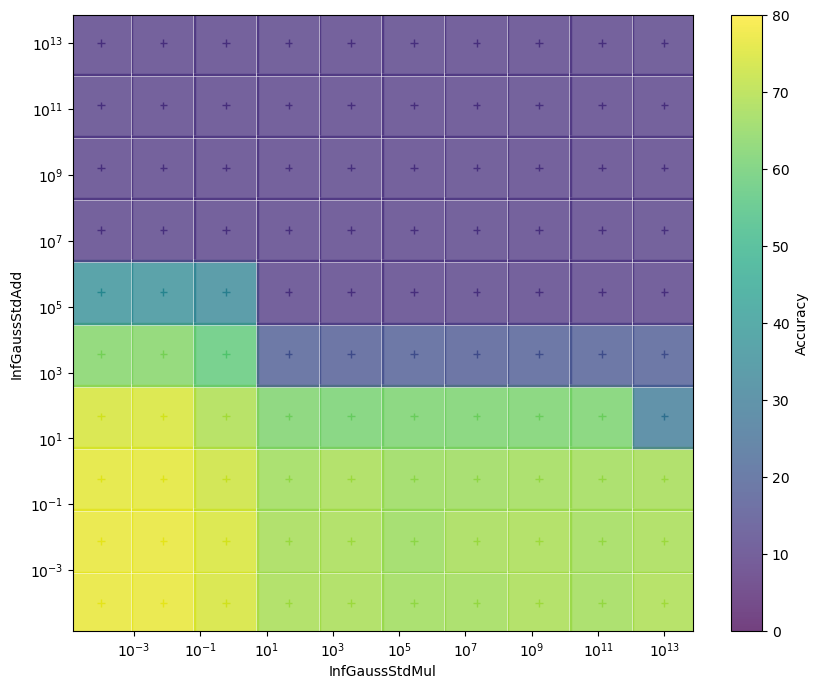

In [15]:
plot_accuracy_inf_config_plot(inf_config_plot_df, vmin_val, vmax_val, postfix='all_max')

In [16]:
def plot_accuracy_train_config_plot_with_red_markers(train_config_plot_df, vmin_val, vmax_val, red_marker_locations, naming_post_fix='', save_plots=True):
    """
    Plots a scatter plot of Accuracy by TrainGaussStdMul and TrainGaussStdAdd with custom markers, color scale, and additional red markers at specified locations.

    Parameters:
    - train_config_plot_df: DataFrame containing the columns 'TrainGaussStdMul', 'TrainGaussStdAdd', and 'Accuracy'.
    - vmin_val: Minimum value for the color scale.
    - vmax_val: Maximum value for the color scale.
    - red_marker_locations: Array of tuples specifying the locations for red markers.
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Define custom rectangle marker
    rect_coords = [(1, -1), (1, 1), (-1, 1), (-1, -1), (1, -1)]  # Rectangle vertices
    rect_codes = [mpath.Path.MOVETO] + [mpath.Path.LINETO]*3 + [mpath.Path.CLOSEPOLY]
    rectangle_path = mpath.Path(rect_coords, rect_codes)
    
    # Plot scatter with rectangle markers
    scatter = ax.scatter(train_config_plot_df['TrainGaussStdMul'], train_config_plot_df['TrainGaussStdAdd'], c=train_config_plot_df['Accuracy'], s=2200, cmap='viridis', alpha=0.75, edgecolors='w', linewidths=0.5, marker=rectangle_path, vmin=vmin_val, vmax=vmax_val)

    # Plot scatter with '+' markers
    ax.scatter(train_config_plot_df['TrainGaussStdMul'], train_config_plot_df['TrainGaussStdAdd'], c=train_config_plot_df['Accuracy'], s=30, alpha=1.0, edgecolors='r', linewidths=1, marker='+', vmin=vmin_val, vmax=vmax_val)

    # Plot additional red markers at specified locations
    for x, y in red_marker_locations:
        ax.plot(x, y, 'r+')  # 'ro' specifies red color and circle marker

    # Set logarithmic scale for both axes
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Set labels and titles
    ax.set_xlabel('TrainGaussStdMul')
    ax.set_ylabel('TrainGaussStdAdd')
    # ax.set_title('Scatter Plot of Accuracy by TrainGaussStdMul and TrainGaussStdAdd')

    # Add colorbar to the plot
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Accuracy')

    # Display the plot
    fig_folder = 'figures'
    if save_plots:
        plt.savefig(f'{fig_folder}/train_plot_with_red_markers_{naming_post_fix}.png')
    plt.show()

In [17]:
def plot_accuracy_inf_config_plot_with_red_markers(inf_config_plot_df, vmin_val, vmax_val, red_marker_locations, naming_post_fix='', save_plots=True):
    """
    Plots a scatter plot of Accuracy by InfGaussStdMul and InfGaussStdAdd with custom markers, color scale, and additional red markers at specified locations.

    Parameters:
    - inf_config_plot_df: DataFrame containing the columns 'InfGaussStdMul', 'InfGaussStdAdd', and 'Accuracy'.
    - vmin_val: Minimum value for the color scale.
    - vmax_val: Maximum value for the color scale.
    - red_marker_locations: Array of tuples specifying the locations for red markers.
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Define custom rectangle marker
    rect_coords = [(1, -1), (1, 1), (-1, 1), (-1, -1), (1, -1)]  # Rectangle vertices
    rect_codes = [mpath.Path.MOVETO] + [mpath.Path.LINETO]*3 + [mpath.Path.CLOSEPOLY]
    rectangle_path = mpath.Path(rect_coords, rect_codes)
    
    # Plot scatter with rectangle markers
    scatter = ax.scatter(inf_config_plot_df['InfGaussStdMul'], inf_config_plot_df['InfGaussStdAdd'], c=inf_config_plot_df['Accuracy'], s=2200, cmap='viridis', alpha=0.75, edgecolors='w', linewidths=0.5, marker=rectangle_path, vmin=vmin_val, vmax=vmax_val)

    # Plot scatter with '+' markers
    ax.scatter(inf_config_plot_df['InfGaussStdMul'], inf_config_plot_df['InfGaussStdAdd'], c=inf_config_plot_df['Accuracy'], s=30, alpha=1.0, edgecolors='r', linewidths=1, marker='+', vmin=vmin_val, vmax=vmax_val)

    # Plot additional red markers at specified locations
    for x, y in red_marker_locations:
        ax.plot(x, y, 'r+')  # 'r+' specifies red color and plus marker

    # Set logarithmic scale for both axes
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Set labels and titles
    ax.set_xlabel('InfGaussStdMul')
    ax.set_ylabel('InfGaussStdAdd')
    # ax.set_title('Scatter Plot of Accuracy by InfGaussStdMul and InfGaussStdAdd')

    # Add colorbar to the plot
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Accuracy')

    fig_folder = 'figures'
    if save_plots:
        plt.savefig(f'{fig_folder}/inf_plot_with_red_markers_{naming_post_fix}.png')
    # Display the plot
    plt.show()

In [18]:
def optimize_for_inference_noise(df, additive_inf_noise_range, multiplicative_inf_noise_range, n=1, mode='best', aggr_fun='mean'):
    """
    Search for the optimal, least optimal, or random training configurations that give the highest, lowest, or random mean accuracy for the given inference noise ranges.

    Parameters:
    - df: DataFrame containing the columns 'InfGaussStdMul', 'InfGaussStdAdd', and 'Accuracy'.
    - additive_inf_noise_range: Tuple containing the minimum and maximum values for the additive inference noise.
    - multiplicative_inf_noise_range: Tuple containing the minimum and maximum values for the multiplicative inference noise.
    - n: Number of values to return.
    - mode: Mode of operation. Can be 'best' for highest mean accuracy, 'worst' for lowest mean accuracy, or 'random' for random configurations.

    Returns:
    Tuple containing:
    - DataFrame containing the n best, worst, or random training configurations based on mean accuracy for the given inference noise ranges.
    - DataFrame containing the mean accuracy for each training configuration for the given inference noise ranges.
    """
    
    # Filter the DataFrame
    filtered_df = df[(df['InfGaussStdMul'] >= multiplicative_inf_noise_range[0]) & (df['InfGaussStdMul'] <= multiplicative_inf_noise_range[1]) & (df['InfGaussStdAdd'] >= additive_inf_noise_range[0]) & (df['InfGaussStdAdd'] <= additive_inf_noise_range[1])]
    # Calculate the mean accuracy for each training configuration
    aggregated_accuracy_df = filtered_df.groupby(['TrainGaussStdMul', 'TrainGaussStdAdd'])['Accuracy'].agg(aggr_fun).reset_index()
    
    # Return based on the mode parameter
    if mode == 'best':
        return aggregated_accuracy_df.nlargest(n, 'Accuracy'), aggregated_accuracy_df
    elif mode == 'worst':
        return aggregated_accuracy_df.nsmallest(n, 'Accuracy'), aggregated_accuracy_df
    elif mode == 'random':
        # Ensure n does not exceed the number of rows in the DataFrame
        n = min(n, len(aggregated_accuracy_df))
        return aggregated_accuracy_df.sample(n), aggregated_accuracy_df
    else:
        raise ValueError("Invalid mode. Choose 'best', 'worst', or 'random'.")

In [19]:
def optimize_for_training_noise(df, additive_train_noise_range, multiplicative_train_noise_range, n=1, mode='best', aggr_fun='mean'):
    """
    ! DISCLAIMER: I DON'T YET KNOW WHAT THE POSSIBLE USE CASE FOR THIS FUNCTION IS, OR HOW ITS RESULTS CAN BE INTERPRETED. !
    Search for the optimal, least optimal, or random inference configurations that give the highest, lowest, or random mean accuracy for the given training noise ranges.

    Parameters:
    - df: DataFrame containing the columns 'TrainGaussStdMul', 'TrainGaussStdAdd', and 'Accuracy'.
    - additive_train_noise_range: Tuple containing the minimum and maximum values for the additive training noise.
    - multiplicative_train_noise_range: Tuple containing the minimum and maximum values for the multiplicative training noise.
    - n: Number of values to return.
    - mode: Mode of operation. Can be 'best' for highest mean accuracy, 'worst' for lowest mean accuracy, or 'random' for random configurations.

    Returns:
    Tuple containing:
    - DataFrame containing the n best, worst, or random inference configurations based on mean accuracy for the given training noise ranges.
    - DataFrame containing the mean accuracy for each inference configuration for the given training noise ranges.
    """
    
    # Filter the DataFrame
    filtered_df = df[(df['TrainGaussStdMul'] >= multiplicative_train_noise_range[0]) & (df['TrainGaussStdMul'] <= multiplicative_train_noise_range[1]) & (df['TrainGaussStdAdd'] >= additive_train_noise_range[0]) & (df['TrainGaussStdAdd'] <= additive_train_noise_range[1])]
    # Calculate the mean accuracy for each inference configuration
    aggregated_accuracy_df = filtered_df.groupby(['InfGaussStdMul', 'InfGaussStdAdd'])['Accuracy'].agg(aggr_fun).reset_index()
    
    # Return based on the mode parameter
    if mode == 'best':
        return aggregated_accuracy_df.nlargest(n, 'Accuracy'), aggregated_accuracy_df
    elif mode == 'worst':
        return aggregated_accuracy_df.nsmallest(n, 'Accuracy'), aggregated_accuracy_df
    elif mode == 'random':
        # Ensure n does not exceed the number of rows in the DataFrame
        n = min(n, len(aggregated_accuracy_df))
        return aggregated_accuracy_df.sample(n), aggregated_accuracy_df
    else:
        raise ValueError("Invalid mode. Choose 'best', 'worst', or 'random'.")

In [20]:
def get_2D_space_corners():
    """
    Returns the corners of the 2D space defined by the inference noise ranges.
    TL: Top Left -> Low multiplicative, high additive
    TR: Top Right -> High multiplicative, high additive
    BL: Bottom Left -> Low multiplicative, low additive
    BR: Bottom Right -> High multiplicative, low additive
    """
    
    possible_values = [0.0001, 0.0077426368268112, 0.5994842503189408, 46.41588833612773, 3593.8136638046253, 278255.94022071257, 21544346.90031878, 1668100537.2000556, 129154966501.48828, 10000000000000.0]

    # Find midpoints for additive and multiplicative noise
    mid_index = len(possible_values) // 2
    additive_mid = possible_values[mid_index]
    multiplicative_mid = possible_values[mid_index]

    # Define corners based on midpoints
    # Note: We use the first and last elements for the extremes and the midpoint to divide the space
    corners = {
        "BR": ([possible_values[0], additive_mid], [multiplicative_mid, possible_values[-1]]),  # Low multiplicative, high additive
        "TR": ([additive_mid, possible_values[-1]], [multiplicative_mid, possible_values[-1]]),    # High multiplicative, high additive
        "BL": ([possible_values[0], additive_mid], [possible_values[0], multiplicative_mid]), # Low multiplicative, low additive
        "TL": ([additive_mid, possible_values[-1]], [possible_values[0], multiplicative_mid])     # High multiplicative, low additive
    }

    # Generate combinations for each corner
    # corner_combinations = {}
    # for corner, (add_range, mult_range) in corners.items():
    #     corner_combinations[corner] = list(itertools.product(add_range, mult_range))

    return corners

In [21]:
# Get the corners of the 2D space defined by the TrainGaussStdMul and TrainGaussStdAdd columns
corners = get_2D_space_corners()

In [22]:
####################
## Plot Config #####
####################

# possible values for the inference noise ranges
possible_values = [0.0001, 0.0077426368268112, 0.5994842503189408, 46.41588833612773, 3593.8136638046253, 278255.94022071257, 21544346.90031878, 1668100537.2000556, 129154966501.48828, 10000000000000.0]
one_value = 0.0001

# additive_inf_noise_range = (one_value, one_value)
# multiplicative_inf_noise_range = (one_value, one_value)

# vertical line 1:
# additive_inf_noise_range = (0.0001, 3593.8136638046253)
# multiplicative_inf_noise_range = (21544346.90031878, 21544346.90031878)

# vertical line 2:
# additive_inf_noise_range = (0.0001, 3593.8136638046253)
# multiplicative_inf_noise_range = (0.5994842503189408, 0.5994842503189408)

# vertical line 3:
# additive_inf_noise_range = (278255.94022071257, 10000000000000.0)
# multiplicative_inf_noise_range = (21544346.90031878, 21544346.90031878)

# vertical line 4:
# additive_inf_noise_range = (278255.94022071257, 10000000000000.0)
# multiplicative_inf_noise_range = (0.5994842503189408, 0.5994842503189408)

# vertical line 5:
# additive_inf_noise_range = (0.0001, 3593.8136638046253)
# multiplicative_inf_noise_range = (0.0001, 0.0001)

# vertical line 6:
# additive_inf_noise_range = (278255.94022071257, 10000000000000.0)
# multiplicative_inf_noise_range = (0.0001, 0.0001)

####################

# horizontal line 1:
# additive_inf_noise_range = (21544346.90031878, 21544346.90031878)
# multiplicative_inf_noise_range = (0.0001, 3593.8136638046253)

# horizontal line 2:
# additive_inf_noise_range = (0.5994842503189408, 0.5994842503189408)
# multiplicative_inf_noise_range = (0.0001, 3593.8136638046253)

# horizontal line 3:
# additive_inf_noise_range = (21544346.90031878, 21544346.90031878)
# multiplicative_inf_noise_range = (278255.94022071257, 10000000000000.0)

# horizontal line 4:
# additive_inf_noise_range = (0.5994842503189408, 0.5994842503189408)
# multiplicative_inf_noise_range = (278255.94022071257, 10000000000000.0)

# horizontal line 5:
# additive_inf_noise_range = (0.0001, 0.0001)
# multiplicative_inf_noise_range = (0.0001, 3593.8136638046253)

# horizontal line 6:
# additive_inf_noise_range = (0.0001, 0.0001)
# multiplicative_inf_noise_range = (278255.94022071257, 10000000000000.0)

####################s

# center square:
# additive_inf_noise_range = (3593.8136638046253, 278255.94022071257)
# multiplicative_inf_noise_range = (3593.8136638046253, 278255.94022071257)

# all values:
additive_inf_noise_range = (0.0001, 10000000000000.0)
multiplicative_inf_noise_range = (0.0001, 10000000000000.0)

# top left range applied
# additive_inf_noise_range = corners['TL'][0]
# multiplicative_inf_noise_range = corners['TL'][1]

current_naming_post_fix = 'all_values_'
current_aggr_fun = 'max'
save_plots = True

optimized_training_config, mean_acc_df_inf = optimize_for_inference_noise(df, additive_inf_noise_range, multiplicative_inf_noise_range, n=5, mode='best', aggr_fun=current_aggr_fun)
optimized_training_config

,TrainGaussStdMul,TrainGaussStdAdd,Accuracy
11,0.007743,0.007743,76.65
1,0.000100,0.007743,76.33
0,0.000100,0.000100,76.25
2,0.000100,0.599484,76.18
10,0.007743,0.000100,76.08


/var/folders/sz/y9cc8wkx58b3gbgkmhx_n1h40000gn/T/ipykernel_38389/607005843.py:23: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(train_config_plot_df['TrainGaussStdMul'], train_config_plot_df['TrainGaussStdAdd'], c=train_config_plot_df['Accuracy'], s=30, alpha=1.0, edgecolors='r', linewidths=1, marker='+', vmin=vmin_val, vmax=vmax_val)


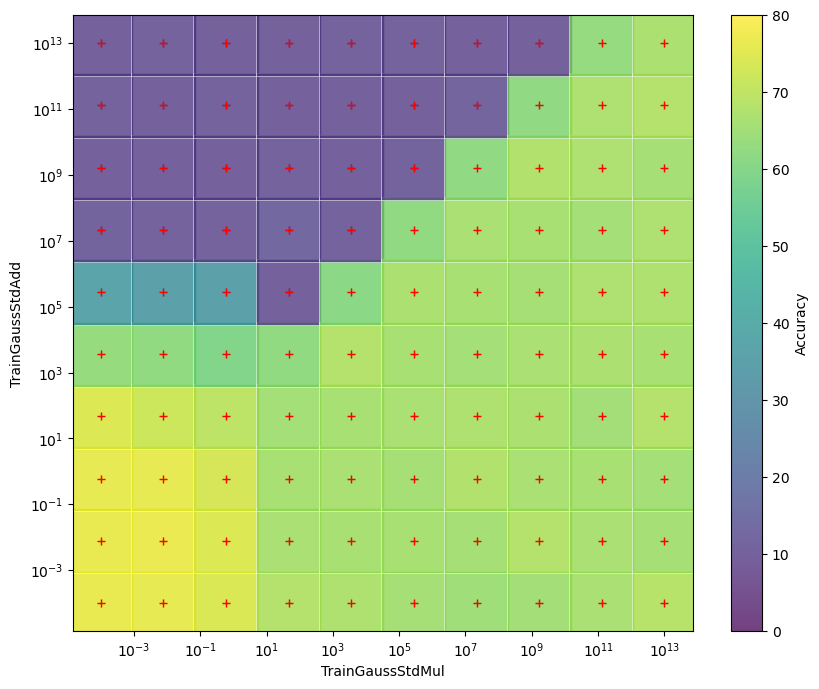

In [23]:
# Filter possible_values based on the inference noise ranges
filtered_additive_values = [x for x in possible_values if additive_inf_noise_range[0] <= x <= additive_inf_noise_range[1]]
filtered_multiplicative_values = [y for y in possible_values if multiplicative_inf_noise_range[0] <= y <= multiplicative_inf_noise_range[1]]

# Generate combinations that fall within the specified noise ranges
red_marker_locations = [(x, y) for x in filtered_multiplicative_values for y in filtered_additive_values]

# Now call your plotting function with the filtered red_marker_locations
plot_accuracy_train_config_plot_with_red_markers(mean_acc_df_inf, vmin_val, vmax_val, red_marker_locations, naming_post_fix=f'{current_naming_post_fix}{current_aggr_fun}', save_plots=save_plots)

Zeigt welche models am besten für die gegebenen inference configurationen sind.

In [24]:
optimized_training_config, aggr_acc_df_training = optimize_for_training_noise(df, additive_inf_noise_range, multiplicative_inf_noise_range, n=5, mode='best', aggr_fun=current_aggr_fun)
optimized_training_config

,InfGaussStdMul,InfGaussStdAdd,Accuracy
0,0.000100,0.000100,76.65
1,0.000100,0.007743,76.64
11,0.007743,0.007743,76.62
10,0.007743,0.000100,76.57
2,0.000100,0.599484,76.12


/var/folders/sz/y9cc8wkx58b3gbgkmhx_n1h40000gn/T/ipykernel_38389/3502010063.py:23: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(inf_config_plot_df['InfGaussStdMul'], inf_config_plot_df['InfGaussStdAdd'], c=inf_config_plot_df['Accuracy'], s=30, alpha=1.0, edgecolors='r', linewidths=1, marker='+', vmin=vmin_val, vmax=vmax_val)


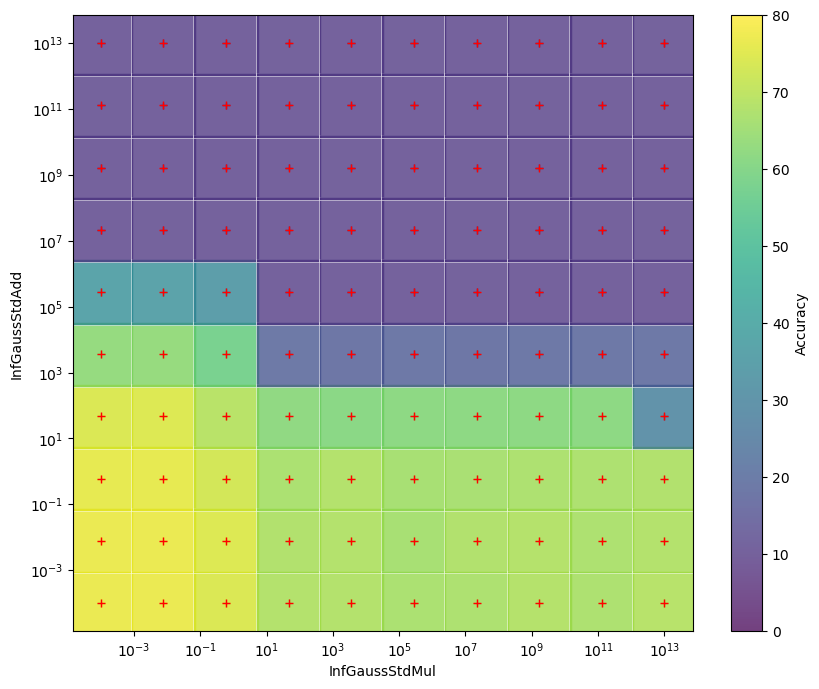

In [25]:
plot_accuracy_inf_config_plot_with_red_markers(aggr_acc_df_training, vmin_val, vmax_val, red_marker_locations, naming_post_fix=f'{current_naming_post_fix}{current_aggr_fun}', save_plots=save_plots)

Zeigt auf welchen inference configurationen die gebenen models am besten sind.